# CNMF demo pipeline: Intro
This demo provides a full pipeline for the analysis of a two-photon calcium imaging dataset (attached or free-floating cells) using the CaImAn software package. It demonstrates how to use Caiman for the following analysis steps:

![Full CNMF Workflow](images/full_cnmf_workflow.jpg)

1) Apply the nonrigid motion correction (NoRMCorre) algorithm for motion correction in a case your organoid is free floating.
2) Apply the constrained nonnegative matrix factorization (CNMF) source separation algorithm to extract initial estimates of neuronal spatial footprints and calcium traces.  
3) Apply quality control metrics to evaluate the initial estimates, and narrow down to the final set of estimates.

In addition to the above core analysis steps, the demo also shows how to extract $\Delta F/F$ for the calcium traces, and  how to use Caiman's multiple visualization tools on your data to inspect the results at each stage.

The CNMF algorithm is best for data with relatively low background noise, like most two-photon data and *some* one photon data (e.g., certain light sheet data). 


The best way to work with this pipeline is in Visual Studio Code (Download it <a href="https://code.visualstudio.com">here</a> ). It will give you nice interface to work with and make quick changes if anything needs to be adjusted for your analysis. I will make step-by-step tutorials on how to use it with screenshots very soon and for now happy to provide group/one-to-one tutorials. 

<div class="alert alert-info">
    <h2 style="margin-top: 0;">Getting more help</h2>
    More detailed background information about CNMF can be found in the <a href="https://pubmed.ncbi.nlm.nih.gov/26774160/">original CNMF paper</a> and <a href="https://pubmed.ncbi.nlm.nih.gov/30652683/">the Caiman paper</a>. If you have specific questions about this demo, or the underlying algorithms, you can ask questions at <a href="https://github.com/flatironinstitute/CaImAn/discussions">GitHub Discussions</a>. If you find a bug or you have a feature request, feel free to <a href="https://github.com/flatironinstitute/CaImAn/issues">open an issue at our Github repo</a>.
</div>

## Imports and general setup
We first need to import the Python libraries we will use in the rest of the notebook and tweak some general settings. Don't worry about these details now, we will explain the important things when they come up. We import `caiman` as `cm`, so when you see `cm` in the rest of the notebook, it just means you are using something custom-written from the Caiman package.  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
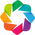

In [2]:
import bokeh.plotting as bpl
import cv2
import datetime
import glob
import holoviews as hv
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import psutil
from pathlib import Path

try:
    cv2.setNumThreads(0)
except():
    pass

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
except NameError:
    pass

import caiman as cm
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import cnmf, params
from caiman.utils.utils import download_demo
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
from caiman.utils.visualization import view_quilt

bpl.output_notebook()
hv.notebook_extension('bokeh')

Continuing with our basic setup, we will set up a logger, and also set some environment variables in case that wasn't done already in your shell. If you want to learn more about Caiman's logger functionality, or tweak your logger (e.g., to log to file instead of your console), see [the relevant documentation](https://caiman.readthedocs.io/en/latest/Getting_Started.html#logging). 

In [3]:
# set up logging
logging.basicConfig(format="{asctime} - {levelname} - [{filename} {funcName}() {lineno}] - pid {process} - {message}",
                    filename=None, 
                    level=logging.WARNING, style="{") #logging level can be DEBUG, INFO, WARNING, ERROR, CRITICAL

# set env variables 
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

## Set up path to data
For this demo, we will analyze the data file `Sue_2x_3000_40_-46.tif`. This 3000-frame movie, provided courtesy of Sue Koay and David Tank, is two-photon data from supragranular parietal cortex of a GCaMP6f-expressing mouse during a virtual reality task. It was collected at 30Hz, and to save space, the demo data has been spatially cropped and downsampled by a factor of 2 compared to the original.  

To get the data, we will use Caiman's built-in `download_demo()` function. It will download the data to  `~/caiman_data/example_movies/`, where `~` is your home directory (the path format and home directory will depend on your operating system). If you already have the movie, it will just return the path to the movie. 

In [4]:
movie_path = download_demo('Sue_2x_3000_40_-46.tif')
print(f"Original movie for demo is in {movie_path}")

KeyboardInterrupt: 

If you want to adapt this demo for your own data, just direct the `movie_path` variable to your own movie:

    movie_path = 'full/path/to/your/your_movie.extension'

While this demo uses a movie that has been stored in <i>tif</i> format, Caiman can handle movies in multiple common (and not so common) formats, including hdf5/h5, n5, zarr, avi, nwb, mat, and npz.  Please reach out if you have problems loading your data into Caiman and it is a common format!

<div class="alert alert-info">
    <h2>Working with multiple files or sessions</h2>
     What if you have a recording that is broken up into multiple files, which is common for many acquisition systems? It is  easy to adapt the current demo for such cases. There are a couple of changes you would need to make. First, you would need to create a <i>list</i> of filepaths:<br>

    movie_path1 = download_demo('Sue_Split1.tif')
    movie_path2 = download_demo('Sue_Split2.tif')
    movie_paths = [movie_path1, movie_path2]

<br>Second, when creating the movie object, instead of using <em>cm.load()</em> you would use <em>cm.load_movie_chain()</em> which takes in a list as an argument:

    movie_orig = cm.load_movie_chain(movie_paths)
    
<br>Also, what if you have <b>noncontiguous</b> recording sessions, for instance data in files from sessions separated by many days or weeks, and you need to match the neurons from these sessions? This is a different use case, and the demo can be found at <a href="./demo_multisession_registration.ipynb">demo_multisession_registration.ipynb</a>.
</div> 

## Visualize raw data
Caiman has a built-in movie class for movie-viewing (documentation [here](https://caiman.readthedocs.io/en/latest/Handling_Movies.html)). Once you have loaded a movie using `cm.load()`, you can view it using `movie.play()`. The `play()` function has multiple parameters you can use to adjust the appearance of the movie: 

    gain: brightness 
    fr:  frame rate
    magnification: scale the size of the display  
    qmax, q_min: percentile for setting vmax, vmin -- below vmin is set to min, above vmax is set to max
    plot_text (Bool): show the frame number
    do_loop (Bool): whether to loop the video 
    
The movie object also has a `resize()` method, which we use in the following to downsample the movie before playing.

Playing the movie uses the `OpenCV` library, so the following cell runs a blocking function (a function that blocks execution of all other code until it is stopped): it will open a separate window that doesn't run in Jupyter. You will need to press `q` on that window to close it (or just wait until it is finished running). 

In [ ]:
# press q to close
movie_orig = cm.load(movie_path) 
downsampling_ratio = 0.2  # subsample 5x
movie_orig.resize(fz=downsampling_ratio).play(gain=1.3,
                                              q_max=99.5, 
                                              fr=30,
                                              plot_text=True,
                                              magnification=2,
                                              do_loop=False,
                                              backend='opencv')

<div class="alert alert-info">
    <h2>Displaying large files</h2><br>
    Loading a movie with <em>cm.load()</em> pulls the data into memory, which is not always feasible. When working with your own data, you might need to adapt the above code when working with extremely large files. Caiman provides tools to handle this use case. One, you can just load some of your data into a movie object using the `subindices` argument to the `load()` function. For example, if you just want to load the first 500 frames of a movie, you can send it <em>subindices=np.arange(0,500)</em>.<br>

<br>If you don't want to truncate your movie, there is a <em>play_movie()</em> function that behaves just like <em>movie.play()</em>, but it doesn't load the movie into memory. Rather, it takes the filename as an argument and loads frames from disk as they are shown. If you want to use it, just import using <em>from caiman.base.movies import play_movie</em> and read the documentation. We don't use it for this demo because the demo movie is small, and we do some calculations on the loaded movie array.<br>

<br>Another option for viewing very large movies is to use the <a href=https://github.com/fastplotlib/fastplotlib>fastplotlib library</a>, which leverages the GPU to provide interactive visualization within Jupyter notebooks (we discuss this more below).
</div>

Let's also create a couple of summary images of the movie, including a *maximum projection* (the maximum value of each pixel) and a *correlation image* (how correlated each pixel is with its neighbors). If a pixel comes from an active neural component it will tend to be highly correlated with its neighbors. 

In [ ]:
max_projection_orig = np.max(movie_orig, axis=0)
correlation_image_orig = cm.local_correlations(movie_orig, swap_dim=False)
correlation_image_orig[np.isnan(correlation_image_orig)] = 0 # get rid of NaNs, if they exist

In [ ]:
f, (ax_max, ax_corr) = plt.subplots(1,2,figsize=(6,3))
ax_max.imshow(max_projection_orig, 
              cmap='viridis',
              vmin=np.percentile(np.ravel(max_projection_orig),50), 
              vmax=np.percentile(np.ravel(max_projection_orig),99.5));
ax_max.set_title("Max Projection Orig", fontsize=12);

ax_corr.imshow(correlation_image_orig, 
               cmap='viridis', 
               vmin=np.percentile(np.ravel(correlation_image_orig),50), 
               vmax=np.percentile(np.ravel(correlation_image_orig),99.5));
ax_corr.set_title('Correlation Image Orig', fontsize=12);

These images will not be particularly sharp yet, as there is still a good deal of motion in the movie. 

> Note the above will generate static images. To view them interactively you can generate them in qt mode by running the cell magic `%matplotlib qt` at the beginning of this Jupyter notebook. If you are in colab or other cloud services, you can wrap figures using the [mpld3 package](https://github.com/mpld3/mpld3). 

## Set initial parameters
In general in Caiman, estimators are first initialized with a set of parameters, and then they are fit against actual data in a separate step. In this section, we'll define a `parameters` object that will subsequently be used to initialize our different estimators. 

The parameters are divided into different categories. We will not discuss them in detail in this section, but will go over them when needed (and note that in this notebook we will mostly focus on CNMF and later steps):

In [ ]:
# general dataset-dependent parameters
fr = 30                     # imaging rate in frames per second
decay_time = 0.4            # length of a typical transient in seconds
dxy = (2., 2.)              # spatial resolution in x and y in (um per pixel)

# motion correction parameters
strides = (48, 48)          # start a new patch for pw-rigid motion correction every x pixels
overlaps = (24, 24)         # overlap between patches (width of patch = strides+overlaps)
max_shifts = (6,6)          # maximum allowed rigid shifts (in pixels)
max_deviation_rigid = 3     # maximum shifts deviation allowed for patch with respect to rigid shifts
pw_rigid = True             # flag for performing non-rigid motion correction

# CNMF parameters for source extraction and deconvolution
p = 1                       # order of the autoregressive system (set p=2 if there is visible rise time in data)
gnb = 2                     # number of global background components (set to 1 or 2)
merge_thr = 0.85            # merging threshold, max correlation allowed
bas_nonneg = True           # enforce nonnegativity constraint on calcium traces (technically on baseline)
rf = 15                     # half-size of the patches in pixels (patch width is rf*2 + 1)
stride_cnmf = 10             # amount of overlap between the patches in pixels (overlap is stride_cnmf+1) 
K = 4                       # number of components per patch
gSig = np.array([4, 4])     # expected half-width of neurons in pixels (Gaussian kernel standard deviation)
gSiz = 2*gSig + 1           # Gaussian kernel width and hight
method_init = 'greedy_roi'  # initialization method (if analyzing dendritic data see demo_dendritic.ipynb)
ssub = 1                    # spatial subsampling during initialization 
tsub = 1                    # temporal subsampling during intialization

# parameters for component evaluation
min_SNR = 2.0               # signal to noise ratio for accepting a component
rval_thr = 0.85             # space correlation threshold for accepting a component
cnn_thr = 0.99              # threshold for CNN based classifier
cnn_lowest = 0.1            # neurons with cnn probability lower than this value are rejected

We place the above parameter values in a dictionary that is passed to the `CNMFParams` class (those parameters *not* explicitly defined will assume default values):

In [ ]:
parameter_dict = {'fnames': movie_path,
                  'fr': fr,
                  'dxy': dxy,
                  'decay_time': decay_time,
                  'strides': strides,
                  'overlaps': overlaps,
                  'max_shifts': max_shifts,
                  'max_deviation_rigid': max_deviation_rigid,
                  'pw_rigid': pw_rigid,
                  'p': p,
                  'nb': gnb,
                  'rf': rf,
                  'K': K, 
                  'gSig': gSig,
                  'gSiz': gSiz,
                  'stride': stride_cnmf,
                  'method_init': method_init,
                  'rolling_sum': True,
                  'only_init': True,
                  'ssub': ssub,
                  'tsub': tsub,
                  'merge_thr': merge_thr, 
                  'bas_nonneg': bas_nonneg,
                  'min_SNR': min_SNR,
                  'rval_thr': rval_thr,
                  'use_cnn': True,
                  'min_cnn_thr': cnn_thr,
                  'cnn_lowest': cnn_lowest}

parameters = params.CNMFParams(params_dict=parameter_dict) # CNMFParams is the parameters class

This parameters object (`parameters`) is basically a collection of dictionaries, each containing a different parameter category. These different dictionaries can be accessed using dot notation.  Some parameters are related to the dataset in general (`parameters.data`), while most are related to specific aspects of the workflow such as motion correction (`parameters.motion`) or quality evaluation (`parameters.quality`).
 
For instance, if you want to inspect the dataset-dependent parameters:

In [ ]:
parameters.data

To access a particular parameter in this parameter field, you just need to get the value from the dictionary using the appropriate key. For instance, to get the frame rate:

In [ ]:
parameters.data['fr'] 

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">To dig deeper into this design</h2>  
    To see more about the design of Caiman estimators and parameters, and their decoupling, see <a href="https://caiman.readthedocs.io/en/latest/Getting_Started.html#estimator-design">our docs on estimator design</a>.
</div>

## Set up multicore processing
Caiman is optimized for parallel computing, and distributes computations to multiple CPU cores for motion correction and CNMF. Setting up the multicore processing is done with the `setup_cluster()` function below. 

First, let's see how many CPUs we have available, and set the number of processors we want to use. If you set `num_processors_to_use` to `None`, then `setup_cluster()` will set it to the default of *one less* than the total number available:

In [ ]:
print(f"You have {psutil.cpu_count()} CPUs available in your current environment")
num_processors_to_use = None

Initialize a cluster of processors. If one has already been set up (the `cluster` variable is already in your namespace), then that cluster will be closed and a new one created.

In [ ]:
if 'cluster' in locals():  # 'locals' contains list of current local variables
    print('Closing previous cluster')
    cm.stop_server(dview=cluster)
print("Setting up new cluster")
_, cluster, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                   n_processes=num_processors_to_use, 
                                                   ignore_preexisting=False)
print(f"Successfully initilialized multicore processing with a pool of {n_processes} CPU cores")

The `cluster` variable is the pool of processors (CPUs) that will be used in many of Caiman's subsequent processing steps. In these later steps, if you set the parameter `dview` to `cluster`, then parallel processing will be used. If instead you set `dview` to `None` then no parallel processing will be used. This latter option can be helpful when debugging, as the logger doesn't typically work for multi-CPU operations.

For more details, please see [our documentation on cluster setup](https://caiman.readthedocs.io/en/latest/Getting_Started.html#cluster-setup-and-shutdown). 

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">Optimizing performance</h2>  
    If you hit memory issues later, there are a few things you can do. First, you may want to lower the number of processors you are using. Each processor uses more RAM, and on a workstation with many processors, you can sometimes get better performance by reducing <em>num_processors_to_use</em>.The best way to determine the optimal number is by trial and error. When you set <em>num_processors_to_use</em> variable to <em>None</em>, it defaults to <i>one</i> less than the total number of CPU cores available (the reason we don't automatically set it to the total number of cores is because in practice this typically leads to worse performance).

<br>Second, if your system has less than 32GB of RAM, and things are running slowly or you are running out of memory, then get more RAM. While you can sometimes get away with less, we recommend a *bare minimum* level of 16GB of RAM, but more is better. 32GB RAM is acceptable, 64GB or more is best. Obviously, this will depend on the size of your data sets.

<br>Third, try subsampling your data. You can *spatially* or *temporally* subsample. If you are already sampling at a low frame rate, you should probably just spatially subsample. You can do this outside of Caiman (many acquisition systems have this capability built in), and load the subsampled file into the notebook directly. This will make subsequent analysis less prone to subtle errors. You can also set Caiman's `ssub` and `tsub` parameters (spatial and temporal subsampling parameters). If you do set `ssub` to 2, then you should divide `gSig` by 2. Dealing with such parameter side-effects is why it is easier to subsample *before* importing data into Caiman. If the results of your analysis with subsampled data look reasonable, then you are good to go. What if you can't subsample your data? 

<br>If none of the above memory optimization procedures work, you may just have too much data for offline CNMF. For this case, we also provide an online version of CNMF (OnACID), which uses a small number of frames to initialize the spatial and temporal components, and iteratively updates the components as new data comes in. This uses much less memory than the offline approach. The demo notebook for OnACID is found in <a href="./demo_OnACID_mesoscope.ipynb">demo_OnACID_mesoscope.ipynb</a>. See the <a href="https://pubmed.ncbi.nlm.nih.gov/30652683/">Caiman paper</a> for more discussion.
</div>

## Motion Correction
The first substantive step in our analysis pipeline is to remove motion artifacts from the original movie:

<img src="images/normcorre_workflow.jpg" alt="motion correction workflow" width="700"/>

It is *very* important to get rid of motion artifacts, as the subsequent CNMF source separation algorithm assumes that each pixel represents the same region of space

First, we initialize the motion correction estimator using the parameters that we set above:   

In [ ]:
mot_correct = MotionCorrect(movie_path, dview=cluster, **parameters.motion)

This notebook focuses on CNMF, not motion correction, but let's consider a couple of the motion correction parameters:

- `pw_rigid=True` tells us that we are going to perform piecewise rigid motion correction using the nonrigid motion correction (NoRMCorre) algorithm (this is because the data seems to exhibit some non-uniform motion). If your data exhibits uniform motion across the field of view, set this to `False` for efficiency.
- NoRMCorre will split the movie into patches that repeat every 48 pixels (`strides`), and have 24 pixels of overlap (`overlaps`): the total patch width is 72 (the sum of stride and overlap).

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">For more on motion correction</h2>  
For a detailed exploration of Caiman's motion correction pipeline, see the <a href="./demo_motion_correction.ipynb">demo_motion_correction.ipynb</a> demo.
</div>

The next step is to run the motion correction algorithm using the `motion_correct()` method. You may see some warnings about negative movie averages: you can ignore them.

In [ ]:
%%time
#%% Run piecewise-rigid motion correction using NoRMCorre
mot_correct.motion_correct(save_movie=True);

Inspect the results: compare the original movie with the motion corrected movie. We are turning the gain up here to highlight motion.

In [ ]:
#%% compare with original movie  : press q to quit
movie_orig = cm.load(movie_path) # in case it was not loaded earlier
movie_corrected = cm.load(mot_correct.mmap_file) # load motion corrected movie
ds_ratio = 0.2
cm.concatenate([movie_orig.resize(1, 1, ds_ratio) - mot_correct.min_mov*mot_correct.nonneg_movie,
                movie_corrected.resize(1, 1, ds_ratio)], 
                axis=2).play(fr=20, 
                             gain=2, 
                             magnification=2) 

Let's look at the max projection and correlation image of the motion corrected movies. In movies that originally contained a lot of movement, the summary images will look more "crisp" than in the originals because they are no longer blurred by movement:

In [ ]:
max_projection = np.max(movie_corrected, axis=0)
correlation_image = cm.local_correlations(movie_corrected, swap_dim=False)
correlation_image[np.isnan(correlation_image)] = 0 # get rid of NaNs, if they exist

In [ ]:
f, ((ax_max_orig, ax_max), (ax_corr_orig, ax_corr)) = plt.subplots(2,2,figsize=(6,6), sharex=True, sharey=True)
# plot max projection
ax_max_orig.imshow(max_projection_orig, 
                   cmap='viridis', 
                   vmin=np.percentile(np.ravel(max_projection_orig),50), 
                   vmax=np.percentile(np.ravel(max_projection_orig),99.5));
ax_max_orig.set_title("Max Projection: Orig", fontsize=12);
ax_max.imshow(max_projection, 
              cmap='viridis', 
              vmin=np.percentile(np.ravel(max_projection),50), 
              vmax=np.percentile(np.ravel(max_projection),99.5));
ax_max.set_title("Max Projection: Corrected", fontsize=12);

# plot correlation image
ax_corr_orig.imshow(correlation_image_orig, 
                    cmap='viridis', 
                   vmin=np.percentile(np.ravel(correlation_image_orig),50), 
                   vmax=np.percentile(np.ravel(correlation_image_orig),99.5));
ax_corr_orig.set_title('Correlation Im: Orig', fontsize=12);
ax_corr.imshow(correlation_image, 
               cmap='viridis', 
               vmin=np.percentile(np.ravel(correlation_image),50), 
               vmax=np.percentile(np.ravel(correlation_image),99.5));
ax_corr.set_title('Correlation Im: Corrected', fontsize=12);

plt.tight_layout()

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">If you don't need to run motion correction</h2>  
If you don't need to run motion correction  (for instance if your movie has no movement -- which is often the case in slice praparations), you can directly memory map your file to prepare for subsequent processing:<br>

    mc_memmapped_fname = cm.save_memmap(movie_path, base_name='memmap_',
                                         order='C', border_to_0=0, dview=cluster)

<br>You would need to modify the rest of your code accordingly (e.g., don't run motion correction, and don't run the following code cell that creates a memmapped file from the motion correction estimator object). 
</div>

## Creating and accessing memory mapped files
The next step is to handle the motion corrected file in memory using a *memory mapped* file. This lets us treat the data *as if* it were in memory while leaving it on disk (for more details about memory mapping, see [our documentation](https://caiman.readthedocs.io/en/latest/Getting_Started.html#memory-mapping)).

In [ ]:
border_to_0 = 0 if mot_correct.border_nan == 'copy' else mot_correct.border_to_0 # trim border against NaNs
mc_memmapped_fname = cm.save_memmap(mot_correct.mmap_file, 
                                        base_name='memmap_', 
                                        order='C',
                                        border_to_0=border_to_0,  # exclude borders, if that was done
                                        dview=cluster)

Yr, dims, num_frames = cm.load_memmap(mc_memmapped_fname)
images = np.reshape(Yr.T, [num_frames] + list(dims), order='F') #reshape frames in standard 3d format (T x X x Y)

Restart the cluster to clean up memory in preparation for CNMF run.

In [ ]:
cm.stop_server(dview=cluster)
_, cluster, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                   n_processes=num_processors_to_use, 
                                                   single_thread=False)

# Run CNMF on patches in parallel

Everything is now set up for running CNMF. This algorithm simultaneously extracts the *spatial footprint* and corresponding *calcium trace* for each component. 

![cnmf patch flow image](images/cnmf_workflow.jpg)

It also performs *deconvolution*, providing an estimate of the spike count that generated the calcium signal in the movie. 

The algorithm is parallelized as illustrated here:

<img src="images/cnmf_patches.jpg" alt="cnmf patch flow" width="500"/>

1) The movie field of view is split into overlapping patches.
2) These patches are processed in parallel by the CNMF algorithm. The degree of parallelization depends on your available computing power: if you have just one CPU then the patches will be processed sequentially. 
3) The results from all the patches are merged, with special focus on components in overlapping regions -- overlapping components are merged if their activity is highly correlated.
4) Results are refined with additional iterations of CNMF (the `refit()` algorithm is run). 

As discussed above, Caiman's main algorithms are run in two steps: first the estimators are *initialized* with a set of parameters, and then they are *fit* against actual data. Let's initialize our CNMF estimator object:

In [ ]:
cnmf_model = cnmf.CNMF(n_processes, 
                       params=parameters, 
                       dview=cluster)

Once initialized, we we could immediately run `cnmf_model.fit(images)` if we knew the parameters were good -- the parameters in your CNMF estimator object are accessible in `cnmf_model.params`. Before running the algorithm, let's go over the key parameters for CNMF. The default values typically work fine for most parameters: there are just a few that you will need to alter based on your data:

### Key parameters for CNMF

`rf (int)`: *patch half-width*

> `rf` ('receptive field') is the half width of patches that in pixels (the actual patch width is `2*rf + 1`). See previous image for a representation of how the field of view is split up into patches for parallel procesing. `rf` should be *at least* 3-4 times larger than the observed neuron diameter. The larger the patch size, the less parallelization will be used by Caiman. If `rf` is set to `None`, then CNMF will be run on the entire field of view. 

`stride (int)`: *patch overlap*

> `stride` is the overlap between patches in pixels (the actual overlap is `stride + 1`). This should be at least the diameter of a neuron. The larger the overlap, the greater the computational load, but the results will be more accurate when stitching together results from different patches. 

`K (int)`: *components per patch*

> `K` is the expected number of components per patch. You should adapt this to the density of components in your data, and the current `rf` parameter. We suggest you pick `K` based on the more dense patches in your movie so you don't miss neurons (we want to avoid false negatives).

`gSig (int, int)`: *half-width of neurons*

> `gSig` is roughly the half-width of neurons in your movie in pixels (height, width): it is the sigma parameter of a Gaussian filter run on all the images during initialization. If the filter matches the neurons, you will get a much better estimate. `gSig` goes with `gSiz`, which is the kernel size (height and width in pixels) used for the filter. See the `GaussianBlur()` OpenCV function for more details on the sigma and size parameters.
    
   
`merge_thr (float)`: *merge threshold* 

> If two spatially overlapping components are correlated above `merge_thr`, they will be merged into one component. The correlation coefficient is calculated using their calcium traces. If Caiman identifies a "component" that clearly contains two overlapping components, then increase `merge_thr`. 

You typically will set `rf` and `stride` infrequently, so `K`, `gSig`, and `merge_thr` are the main parameters you will tweak when analyzing a given session. Note these are not the *only* important parameters. They just tend to be the *most* important: the others tend to depend on your calcium indicator or other factors that don't vary within an experimental session. 

### Selecting spatial parameters
To select the spatial parameters (`gSig`, `rf`, `stride`, `K`), you need to look at your movie, or a summary image for your movie, and pick values close to those suggested by the guidelines above. It is helpful to use `view_quilt()` function to see if our key spatial parameters are in the right ballpark (note we recommend running this viewer in interactive qt mode so you can interact with it and get a better feel for the parameters):

In [ ]:
# calculate stride and overlap from parameters
cnmf_patch_width = cnmf_model.params.patch['rf']*2 + 1
cnmf_patch_overlap = cnmf_model.params.patch['stride'] + 1
cnmf_patch_stride = cnmf_patch_width - cnmf_patch_overlap
print(f'Patch width: {cnmf_patch_width} , Stride: {cnmf_patch_stride}, Overlap: {cnmf_patch_overlap}');

# plot the patches
patch_ax = view_quilt(correlation_image, 
                      cnmf_patch_stride, 
                      cnmf_patch_overlap, 
                      vmin=np.percentile(np.ravel(correlation_image),50), 
                      vmax=np.percentile(np.ravel(correlation_image),99.5),
                      figsize=(4,4));
patch_ax.set_title(f'CNMF Patches Width {cnmf_patch_width}, Overlap {cnmf_patch_overlap}');

Let's evaluate our spatial parameters using the quilt plot

- Is the patch width at least three times the width of a neuron? Yes
- Do individual neurons fit in the overlap region (`stride`)? Yes. 
- When in interactive mode, you can zoom and inspect the average width of each neuron in pixels. Is `gSig` about half that? Yes. Each neuron is about 6-8 pixels wide, and `gSig` is 4.
- For `K`: how many neurons are in each patch? Remember you want an upper bound, not an average. The current value of 4 seems good.

Keep in mind that there is typically no *perfect* set of parameter values: ultimately the only way to know if a set of parameters is good is to fit the model and see how well it performs. Sometimes you just have to iteratively search a bit in parameter space. 

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">How to change parameters</h2>  
    
If the parameters were <em>not</em> good, then you could change them using the `change_params()` method, which takes in a dictionary of new parameter values. For instance, if we wanted to change gSig to 5:<br>

    new_parameters = {'gSig': 5}
    cnmf_model.params.change_params(params_dict=new_parameters)
      
<br>It is not always efficient to cobble together iterative parameter search from scratch, especially if you end up needing to do a grid search in a large parameter space. <a href=https://github.com/nel-lab/mesmerize-core>Mesmerize</a> is a great package built to make parameter exploration in Caiman faster and more convenient: it keeps track of all your different results, and includes powerful GPU-based tools (based on the <a href="https://github.com/fastplotlib/fastplotlib">fastplotlib library</a>) for visualization of results in Jupyter notebooks.
</div>

### Run CNMF
Now that we are happy with our parameters, let's run the cnmf algorithm using the `fit()` method. 

In [ ]:
%%time
cnmf_fit = cnmf_model.fit(images)

Briefly inspect the results by plotting contours of identified components using `plot_contours_nb()`. 

You can interactively explore this plot in your notebook with the help of the buttons on the right-hand-side of the plot (it was made using the [Bokeh](https://bokeh.org/) library). They let you zoom, pan, reset, or save the image.

In [ ]:
cnmf_fit.estimates.plot_contours_nb(img=correlation_image);

Note this is just an initial result, which will contain many false positives, which is to be expected. The main concern to watch for here is whether you have lots of false *negatives* (has the algorithm missed neurons?). False negatives are hard to fix later, so if you have an unacceptable number, be sure to go back and re-run CNMF with new parameters.

> If you get a data rate error with any notebook plotting commmands, can start your notebook using     
`jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10`

### Re-run (seeded) CNMF  on the full field of view 
It is usually helpful to refine the initial estimates by re-running the CNMF algorithm seeded just on the spatial estimates from the previous step using the `refit()` method. 

In [ ]:
%%time
cnmf_refit = cnmf_fit.refit(images, dview=cluster)

The spatial contours of the new estimates should now look cleaner and more canonically neuronal in shape:

In [ ]:
cnmf_refit.estimates.plot_contours_nb(img=correlation_image);

While the estimates look better, there is still garbage that was collected: there are still false positives. The next **component evaluation** stage of the pipeline will evaluate the initial set of estimates, and remove the bad ones. But first, let's disuss the estimates object.

> If you are using this notebook to get hints for how to run CNMFE, **do not** run this `refit()` step. It is not needed, and not implemented, for CNMFE. 

# The estimates class
The main point of the CNMF algorithm is to perform source separation to extract the location of neurons and calcium activity traces from your raw data. This information, and many useful methods for visualization and analysis, are contained in Caiman's `Estimates` class. In the above code, an `estimates` object was generated when you ran the CNMF algorithm (you can find it in `cnmf_refit.estimates`). 

The rest of this notebook, from component evaluation to calculation of DFoF, is effectively an exploration of the properties and methods of the `Estimates` class. The most important estimates generated, which are properties of the `cnmf_refit.estimates`, are given in the following table:

| Variable | Meaning | Shape |
|:-------- |:------------- |:--------------------- |
| **C** | Denoised calcium traces |  num components x num_frames |
| **F_dff** | $\Delta F/F$ |  num_components x num_frames |
| **S** | Spike count estimate for each component from deconvolution, if used |  num_components x num_frames |
| **YrA** | Residual for each trace |  num_components x num_frames |
| **A** | Spatial components/footprints |  num pixels x num components |

To recover raw calcium traces, you can add together the denoised calcium traces and their residuals (`C + YrA`). Note that the `F_dff` calculation is not done automatically, so when you run `fit()` the `F_dff` field will initially be `None`. Below, we will show how to populate that field.

In [ ]:
# see shape of A and C
cnmf_refit.estimates.A.shape, cnmf_refit.estimates.C.shape

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">More on Estimates</h2>
    The estimates object contains a great deal of information. The attributes are discussed in more detail <a href="https://caiman.readthedocs.io/en/latest/Getting_Started.html#result-interpretation">in the documentation</a>, but you might also find exploring the <a href="https://github.com/flatironinstitute/CaImAn/blob/main/caiman/source_extraction/cnmf/estimates.py">source code</a> helpful. For instance, while most users initially care about the extracted calcium signals <em>C</em> and spatial footprints <em>A</em>, the <b>background model</b> is also very important. The background model is included in the estimate in fields <em>b</em> and <em>f</em> (which correspond to the spatial and temporal components of the low-rank background model, respectively). We discuss the background model more below.

<br>We realize that attribute names like <em>A</em> are not very informative or Pythonic. These names are rooted in mathematical conventions from the original papers in the literature.
</div>

# Component Evaluation
As already mentioned, the initial estimates produced by CNMF contains many spurious components. Our next step is to do some some quality control, cutting out the bad estimates to arrive at our final set of estimates:

![component evaluation image](images/evaluation_workflow.jpg)

We will evaluate each component by applying the `evaluate_components()` method. The criteria Caiman uses to evaluate components are:  

- **Signal to noise ratio (SNR)**: a baseline noise estimate is extraced for each raw calcium trace, and SNR during calcium transients is calculated relative to this baseline. These values are stored in `estimates.SNR_comp`. Those components with high SNR are higher quality, and less likely to be false positives.
- **Spatial correlation**: the extracted spatial footprints in `estimates.A` should be highly correlated with activity in the actual movie, at least on those frames when that component is active. These correlation coefficients are stored in `estimates.r_values`. 
- **CNN confidence**: Each spatial component in `estimates.A` is passed through a CNN-based classifier, trained on consensus data sets, that produces a confidence value between 0 and 1 that the shape is a real neuron. These are stored in `estimates.cnn_preds`.

The first two criteria are illustrated schematically here (see also Figure 2 of <a href="https://elifesciences.org/articles/38173">the Caiman paper</a>):

![component evaluation image](images/component_evaluation.jpg)

The `evaluate_components()` method uses the above criteria to sort components into accepted and rejected components. For each criterion, there is a threshold value in `quality` field of the parameters object -- the thresholds are `min_SNR`, `rval_thr`, and `min_cnn_thr`, respectively. If a unit is below *all* of those threshold values, it will be rejected.

In [ ]:
print("Thresholds to be used for evaluate_components()")
print(f"min_SNR = {cnmf_refit.params.quality['min_SNR']}")
print(f"rval_thr = {cnmf_refit.params.quality['rval_thr']}")
print(f"min_cnn_thr = {cnmf_refit.params.quality['min_cnn_thr']}")

Run `estimates.evaluate_components()`. This can take a few minutes if you have a very large number of components:

In [ ]:
cnmf_refit.estimates.evaluate_components(images, cnmf_refit.params, dview=cluster);

This method filled in two arrays in the `estimates` class: `idx_components` (accepted) and `idx_components_bad` (rejected). 

In [ ]:
print(f"Num accepted/rejected: {len(cnmf_refit.estimates.idx_components)}, {len(cnmf_refit.estimates.idx_components_bad)}")

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">More on component evaluation</h2>  
In practice, SNR is the most important evaluation factor. The spatial correlation factors are less important. In particular, the CNN for spatial evaluation may be inaccurate if your neural components are not "canonically" shaped somata. 


<br>When running <em>evaluate_components()</em> the three evaluation thresholds are appied <em>inclusively</em>: if a component is above <em>any</em> of the thresholds, it will pass muster. This was found in practice to be reasonable (e.g., a low SNR component that is very strongly neuronally shaped tends to not be an accident: it is just a very low SNR neuron). However, there is a second set of <b>absolute</b> threshold parameters  set for each criterion. If a component is <em>below</em> this absolute threshold for any of the evaluation parameters, it will be discarded: these are the <em>SNR_lowest</em>, <em>rval_lowest</em>, and <em>cnn_lowest</em>, respectively. 
</div>

## Visualizing results
We've sorted our components into accepted/rejected, so it's time to start looking at the results! Caiman provides many built-in `estimates` methods for visualizaing results. 

### All contours
We have already used `plot_contours_nb()`, but if we provide it the `idx` keyword it will split the view into accepted and rejected components.

In [ ]:
cnmf_refit.estimates.plot_contours_nb(img=correlation_image, 
                                      idx=cnmf_refit.estimates.idx_components);

### View individual spatial/temporal components
One of the most useful visualization tools is `nb_view_components()`, which lets you scroll through individiual spatial and temporal components. This tool also displays the values of the three evaluation criteria for each component, which can be useful if you feel you need to change your evaluation criteria and re-run `evaluate_components()`. Perhaps you have too many false negatives and want to lower your SNR threshold. 

In [ ]:
# view accepted components
cnmf_refit.estimates.nb_view_components(img=correlation_image, 
                                        idx=cnmf_refit.estimates.idx_components,
                                        cmap='gray');

The above shows the raw traces (`C+YrA`) by default, but you can superimpose the denoised traces from `C` if you add a color to the `denoised_color` parameter. As always in Jupyter, if you are unsure how a method works, you can enter `cnmf_refit.estimates.nb_view_components?` in a new cell to get the documentation for the method. 

We can also view the rejected compoonents:

In [ ]:
# rejected components
if len(cnmf_refit.estimates.idx_components_bad) > 0:
    cnmf_refit.estimates.nb_view_components(img=correlation_image, 
                                            idx=cnmf_refit.estimates.idx_components_bad, 
                                            cmap='gray',
                                            denoised_color='red')
else:
    print("No components were rejected.")

> One legacy from Matlab with these plotters is that they use one-based indexing when showing `Neuron number`. This can make it confusing when comparing to your own plotting results which will use zero-based indexing.

### Building your own visualizations
> This is a slightly more advanced section that you can safely skip your first time through. 

There are many custom visualizations you can build yourself based on the estimates generated from Caiman. For example, what if you wanted to plot the spatial footprint of a neuron with the contour superimposed?  The contours of the spatial footprints are in `estimates.coordinates`, which is a list of dictionaries corresponding to each component. The dictionary includes a `coordinates` field that contains the x,y coordinates of the contour. Here we'll show how to plot this contour superimposed on the corresponding spatial footprint in `A`. 

The following extracts all of the contours of the accepted components into a list from the estimates (it puts them in a list because they are not all the same size):

In [ ]:
idx_accepted = cnmf_refit.estimates.idx_components
all_contour_coords = [cnmf_refit.estimates.coordinates[idx]['coordinates'] for idx in idx_accepted]

Each footprint in `A` is stored as a compressed sparse column array. We can convert it to a dense array with `toarray()`, and plot the contour and footprint together:

In [ ]:
idx_to_plot = 30
component_number = idx_accepted[idx_to_plot]
component_contour = all_contour_coords[idx_to_plot]
component_footprint = np.reshape(cnmf_refit.estimates.A[:, component_number].toarray(), dims, order='F')

In [ ]:
plt.figure(); 
plt.imshow(component_footprint, cmap='gray');
plt.plot(component_contour[:, 0], 
         component_contour[:, 1], 
         color='pink', 
         linewidth=2)
plt.title(f'Footprint/Contour {component_number}');

 ## How to save and load results (optional)
There is a built-in `save()` method for the `cnmf` object. It can save as `hdf5` or `nwb`.

> Note: when you save, you are only saving what is contained in the `cnmf` object. If you want to save other things in your workspace at the same time, you can attach them to your `estimates` object. We'll show how to do this with the correlation image which is useful for plotting.

In [ ]:
save_results = True
if save_results:
    save_path =  r'demo_pipeline_results.hdf5'  # or add full/path/to/file.hdf5
    cnmf_refit.estimates.Cn = correlation_image # squirrel away correlation image with cnmf object
    cnmf_refit.save(save_path)

### Loading saved results
You can use the `load_CNMF()` method to load your saved results. 

In [ ]:
load_results = True
if load_results:
    save_path =  r'demo_pipeline_results.hdf5'  # or add full/path/to/file.hdf5
    cnmf_refit = cnmf.load_CNMF(save_path, 
                                n_processes=num_processors_to_use, 
                                dview=cluster)
    correlation_image = cnmf_refit.estimates.Cn
    print(f"Successfully loaded data.")

# A few final things
We have extracted the calcium traces `C`, spatial footprints `A`, and estimated spike counts `S`, which is the main goal with CNMF. But there are a few important things remaining.

## Extract $\Delta F/F$ values
So far our calcium traces are in arbitrary units. It is more common to report the calcium fluorescence relative to some baseline value $F_0$:

$$
\Delta F/F = (F(t)-F_0)/F_0
$$

Traditionally, the baseline value was calculated during some initial period of queiscience (e.g., in the visual system, when the animal was sitting in the dark). However, it is problematic to make any assumptions about a "quiet" baseline period, so researchers have started to use a moving average to calculate $F_0$. This is also what Caiman does.

More specifically, in Caiman the baseline is a running percentile calculated over a `frames_window` moving window. You can calculate $\Delta F/F$ using raw traces or the denoised traces in C (this is toggled using the `use_residuals` argument).

In [ ]:
if cnmf_refit.estimates.F_dff is None:
    print('Calculating estimates.F_dff')
    cnmf_refit.estimates.detrend_df_f(quantileMin=8, 
                                      frames_window=250,
                                      flag_auto=False,
                                      use_residuals=False);  
else:
    print("estimates.F_dff already defined")

The `estimates` object will now have a `F_dff` field, which makes it easier to compare traces across neurons/sessions because the data is normalized. Note that F_dff values can be positive or negative because it is relative to a baseline value that is the "zero" value.

We can plot a temporal trace of a dff with time. In the following, we'll generate a `frame_time` variable for plotting. This is an  idealized time representation using `linspace()`, which assumes that images were acquired at a constant frequency throughout the session. In practice your hardware probably returns the time at which each frame was acquired, so you can use that information in your own analysis if you have it. 

In [ ]:
frame_rate = cnmf_refit.params.data['fr']
frame_pd = 1/frame_rate
frame_times = np.linspace(0, num_frames*frame_pd, num_frames);

In [ ]:
# plot F_dff
idx_to_plot = 30
idx_accepted = cnmf_refit.estimates.idx_components
component_number = idx_accepted[idx_to_plot]
f, ax = plt.subplots(figsize=(7,2))
ax.plot(frame_times, 
        cnmf_refit.estimates.F_dff[component_number, :], 
        linewidth=0.5,
        color='k');
ax.set_xlabel('Time (s)')
ax.set_ylabel('$\Delta F/F$')
ax.set_title(f"$\Delta F/F$ for unit {component_number}");
plt.tight_layout()

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">More on $\Delta F/F$</h2>  
The above discussion of dff leaves out some details about it is actually calculated in Caiman. In practice, Caiman locally projects the model of the background activity to the spatial footprint of the neuron, and adds a moving percentile of this projected trace to the denominator as an additional normalizing term (see the discussion on the background model below). This acts as an empirical fudge factor that can keep $\Delta F/F$ from getting too large for very small values of $F_0$ (especially when using denoised traces). Users may prefer to use the more traditional equation directly. Thanks to Peter Rupprecht for a helpful discussion of this topic. 
</div>

## Select only accepted components (optional)
If you want to discard rejected components (`estimates.idx_components_bad`) from the `estimates` field, you can run  `select_components()`. This can be useful if you are sure you only want to focus on the accepted components for downstream analysis (e.g., to share final results with colleagues, for instance).

<div class="alert alert-warning" markdown="1">
    <h4 style="margin-top: 0;">Warning: select_components() is a destructive operation</h4>  
If you run this command, the rejected components will be removed from your <em>estimates</em> field. If you think you might want them later, you can set the <em>save_discarded_components</em> parameter to <em>True</em>. This will let you retrieve them later with the <em>restore_discarded_components()</em> method. 
</div>

In [ ]:
cnmf_refit.estimates.select_components(use_object=True);

The `use_object` parameter specifies that we want to select the accepted components in `estimates.idx_components` (and remove the components in `idx_components_bad`). 

## Display final results
View the final refined set of remaining components.

In [ ]:
cnmf_refit.estimates.nb_view_components(img=correlation_image, 
                                        denoised_color='red',
                                        cmap='gray');

## Save results to csv
When we showed how to save/load the cnmf model above, that was for working with the entire estimator object (for instance if you want to save your work and start again later). Often users just want to save certain results such as the calcium traces in `C` to csv and do downstream analysis later. In Python it is easiest to do this using the Pandas package.

The following shows how to save your calcium traces to a file called `C_traces.csv`, to the `caiman_data` folder. You can adapt this code to save other data fields such as dff. We will also save the frame times as a convenient reference.

In [ ]:
data_to_save = np.vstack((frame_times, cnmf_refit.estimates.C)).T  # Transpose so time series are in columns
save_df = pd.DataFrame(data_to_save)
save_df.rename(columns={0:'time'}, inplace=True)
# check out the dataframe
save_df.head()

Set up file path and save using the Pandas `to_csv()` method:

In [ ]:
c_save_path = cm.paths.get_tempdir() + '\\C_traces.csv'
save_df.to_csv(c_save_path, index=False)
print(f"Saved estimates.C to {c_save_path}")

## View different result movies
### An aside on the underlying model
To understand the next two visualizations, we need to discuss the model used by Caiman a little bit. The CNMF algorithm models the original movie as a sum of *neural activity* and *background activity*: the *noise* (or *residual*) is everything left out:

    original_movie = neural_activity + background + residual
    
In this model, `neural_activity` is the product of the matrices `AC`, the spatial and temporal components we have been exploring (`estimates.A` and `estimates.C`). It is our model of the neural bits that we care about.

`background` is the model's representation of all the background activity in our movie that we wish wasn't there -- this includes stray fluorescence from the neuropil and out-of-plane neural components. This background model is also broken up into spatial and temporal components, which are in `estimates.b` (background) and `estimates.f` (fluctuations), respectively. 

The "noise", or residual term, is by definition, everything else not captured by the model: 

    residual = original_movie - neural_activity - background

### View denoised movie
We can rearrange the equations above to yield a "denoised" movie, which is just the original movie with the residual removed:

    denoised_movie = original_movie - residual = neural_activity + background
    
Plugging in appropriate terms from the models of neural activity and background activity (`AC` and `bf`) yields:

In [ ]:
# reconstruct denoised movie
neural_activity = cnmf_refit.estimates.A @ cnmf_refit.estimates.C  # AC
background = cnmf_refit.estimates.b @ cnmf_refit.estimates.f  # bf
denoised_movie = neural_activity + background  # AC + bf

# turn into a movie object
denoised_movie = cm.movie(denoised_movie).reshape(dims + (-1,), order='F').transpose([2, 0, 1])

View the denoised movie (with background included):

In [ ]:
# press q to quit
downsampling_ratio = 0.2
denoised_movie.resize(fz=downsampling_ratio).play(gain=0.8,
                                                  q_min=30,
                                                  q_max=99, 
                                                  fr=30,
                                                  plot_text=True,
                                                  magnification=3,
                                                  backend='opencv')

### Visualize data, predicted activity, and residual
For our final visualization, we will use a built-in method `play_movie()` that shows the original movie, the predicted movie (either `AC` or `AC + bf`), and the residual. 

Viewing the residuals (what the model doesn't explain) can be extremely useful: if you end up seeing lots of neural activity in the residual movie, that means your model is leaving something important out, and you might need to go tweak some parameters. In fact, in Caiman's online algorithms, this is how we decide whether to add new neurons after initialization! If neural activity is discovered in the residual buffer, then it's time to add a new neuron to `AC`! In the offline algorithms, it just means you might need to go check your parameters. No model is perfect: there is always some residual. You have to use your judgment about whether it is worth chasing with additional fitting.

> The `play_movie()` method has an option to include the background from the model (`bf`) or not (this is the `include_bck` Boolean parameter). If you set it to `False`, it will subtract `bf` from the original movie and will only include `AC` in the middle panel. 

In [ ]:
# in case you are working from loaded data, recover the raw movie
Yr, dims, num_frames = cm.load_memmap(cnmf_refit.mmap_file)
images = np.reshape(Yr.T, [num_frames] + list(dims), order='F')

In [ ]:
cnmf_refit.estimates.play_movie?

In [ ]:
# press q to quit (can take a while to start running)
cnmf_refit.estimates.play_movie(images, 
                                q_max=99.9, 
                                gain_res=0.5,
                                magnification=2,
                                include_bck=True,
                                use_color=True,
                                frame_range=slice(None, None, 5), # sample every 5th frame for speedup
                                thr=0); # set thr to 0.1 to see contours

Note that if you ran `select_components()` to remove rejected components, the residual movie will contain activity from those rejected bits. This doesn't mean the model is bad: the movie is simply showing false positives you already removed.

# What next?
The goal of Caiman is to help you extract high-quality signals from your data, and we have achieved that goal with the above steps. The next step, of doing actual *analysis* of these results, is where the most interesting neuroscience happens: what are the statistical features of these signals? How do they relate to other environmental, molecular, behavioral, and neuronal features that you are studying? What kinds of visualization and analysis tools can you build around this infrastructure? If you find/publish things that help, please share them with us, as we would love to hear about them! 

# Clean up open resources
We have a few resources we have left open we should take care of.

## Shut down cluster 
To free up processing resources, let's shut down the cluster in case it is still open. 

In [ ]:
cm.stop_server(dview=cluster)

## Shut down logger, optionally remove log files
If you set up your logger to log to files, and you don't want to preserve them, you can delete them with the following. If you have custom log filenames, you may have to change the `log_files` pattern for the following to work. 

In [ ]:
# Shut down logger (otherwise will not be able to delete it)
logging.shutdown()

In [ ]:
delete_logs = True
logging_dir = cm.paths.get_tempdir() 
if delete_logs:
    log_files = glob.glob(logging_dir + '\\demo_pipeline' + '*' + '.log')
    for log_file in log_files:
        print(f"Deleting {log_file}")
        os.remove(log_file)
else:
    print(f"If you want to inspect your logs they are in {logging_dir}")